In [1]:
from scipy import stats

from numpy import log

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-5-23'

In [2]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [3]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> .ipynb_checkpoints
1 -> 01-caso_full_2020-04-22.csv
2 -> 02-caso_full_2020-04-30.csv
3 -> 03-caso_full_2020-05-13.csv
4 -> 04-caso_full_2020-05-23.csv
5 -> artigo
6 -> cities.csv
7 -> covid19_municipios.csv
8 -> COVID19_REGIOES BR.csv
9 -> Dados_demográficos_municípios.xlsx
10 -> Dados_demográficos_municípios_new.xlsx
11 -> Datalab_COVID.pptx
12 -> Data_set_socioeconomic_characteristics.csv
13 -> figures
14 -> health_charateristics (2).csv
15 -> idade.xlsx
16 -> obito_cartorio.csv
17 -> População residente municipal x população faixa etária.csv
18 -> População residente por estado - 2015.csv
19 -> População residente x sexo.csv
20 -> results


In [4]:
date = 4
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
108690,NaN,43.0,2020-05-22,21,11377239.0,True,False,5918,52.01614,2020-05-22,0.0291,172,74,state,RS,445,6
108691,NaN,42.0,2020-05-22,21,7164788.0,False,True,5610,78.29960,2020-05-21,0.0175,98,72,state,SC,0,0
108692,NaN,28.0,2020-05-22,21,2298696.0,False,True,4734,205.94285,2020-05-21,0.0161,76,70,state,SE,0,0
108693,NaN,35.0,2020-05-22,21,45919049.0,True,False,76871,167.40547,2020-05-22,0.0751,5773,88,state,SP,3132,215
108694,NaN,17.0,2020-05-22,21,1572866.0,False,True,2205,140.18995,2020-05-21,0.0222,49,66,state,TO,0,0


In [5]:
# df_cov = df_cov[(df_cov['last_available_date'] == '2020-04-10') & (df_cov['place_type'] == 'city')][[
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
#     "city",
#     "last_available_date"
# ]]
# df_cov = df_cov.rename(columns={
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed/100k",
#     "last_available_death_rate": "Death Rate",
#     "city": "City",
#     "last_available_date": "Date"
# })
# df_cov.index.name = 'Date'
# df_cov.head()

In [6]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108695 entries, 0 to 108694
Data columns (total 17 columns):
city                                             106774 non-null object
city_ibge_code                                   107693 non-null float64
date                                             108695 non-null object
epidemiological_week                             108695 non-null int64
estimated_population_2019                        107693 non-null float64
is_last                                          108695 non-null bool
is_repeated                                      108695 non-null bool
last_available_confirmed                         108695 non-null int64
last_available_confirmed_per_100k_inhabitants    105266 non-null float64
last_available_date                              108695 non-null object
last_available_death_rate                        108695 non-null float64
last_available_deaths                            108695 non-null int64
order_for_place             

In [7]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']
df['Deaths'] = group.sum()['last_available_deaths']
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-02-25,2,0,0.01034
2020-02-26,2,0,0.01034
2020-02-27,2,0,0.01034
2020-02-28,4,0,0.02068
2020-02-29,4,0,0.02068


In [8]:
df.tail()

,Confirmed,Deaths,Confirmed/100k
Date,,,
2020-05-18,513200,33849,260978.49702
2020-05-19,540606,35822,281462.18711
2020-05-20,583998,38112,311253.05345
2020-05-21,622265,40216,336148.95691
2020-05-22,643561,41634,349430.18165


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2020-02-25 to 2020-05-22
Data columns (total 3 columns):
Confirmed         88 non-null int64
Deaths            88 non-null int64
Confirmed/100k    88 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.8 KB


In [10]:
g = 1
campo = 'Confirmed'
print_campo = 's'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [11]:
df = pd.DataFrame(df[campo])

# Augmented Dickey Fuller test
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.443347
p-value: 0.561328


In [12]:

# Adf Test
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss'))

# PP test:
print(ndiffs(df, test='pp'))

2
2
2


C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


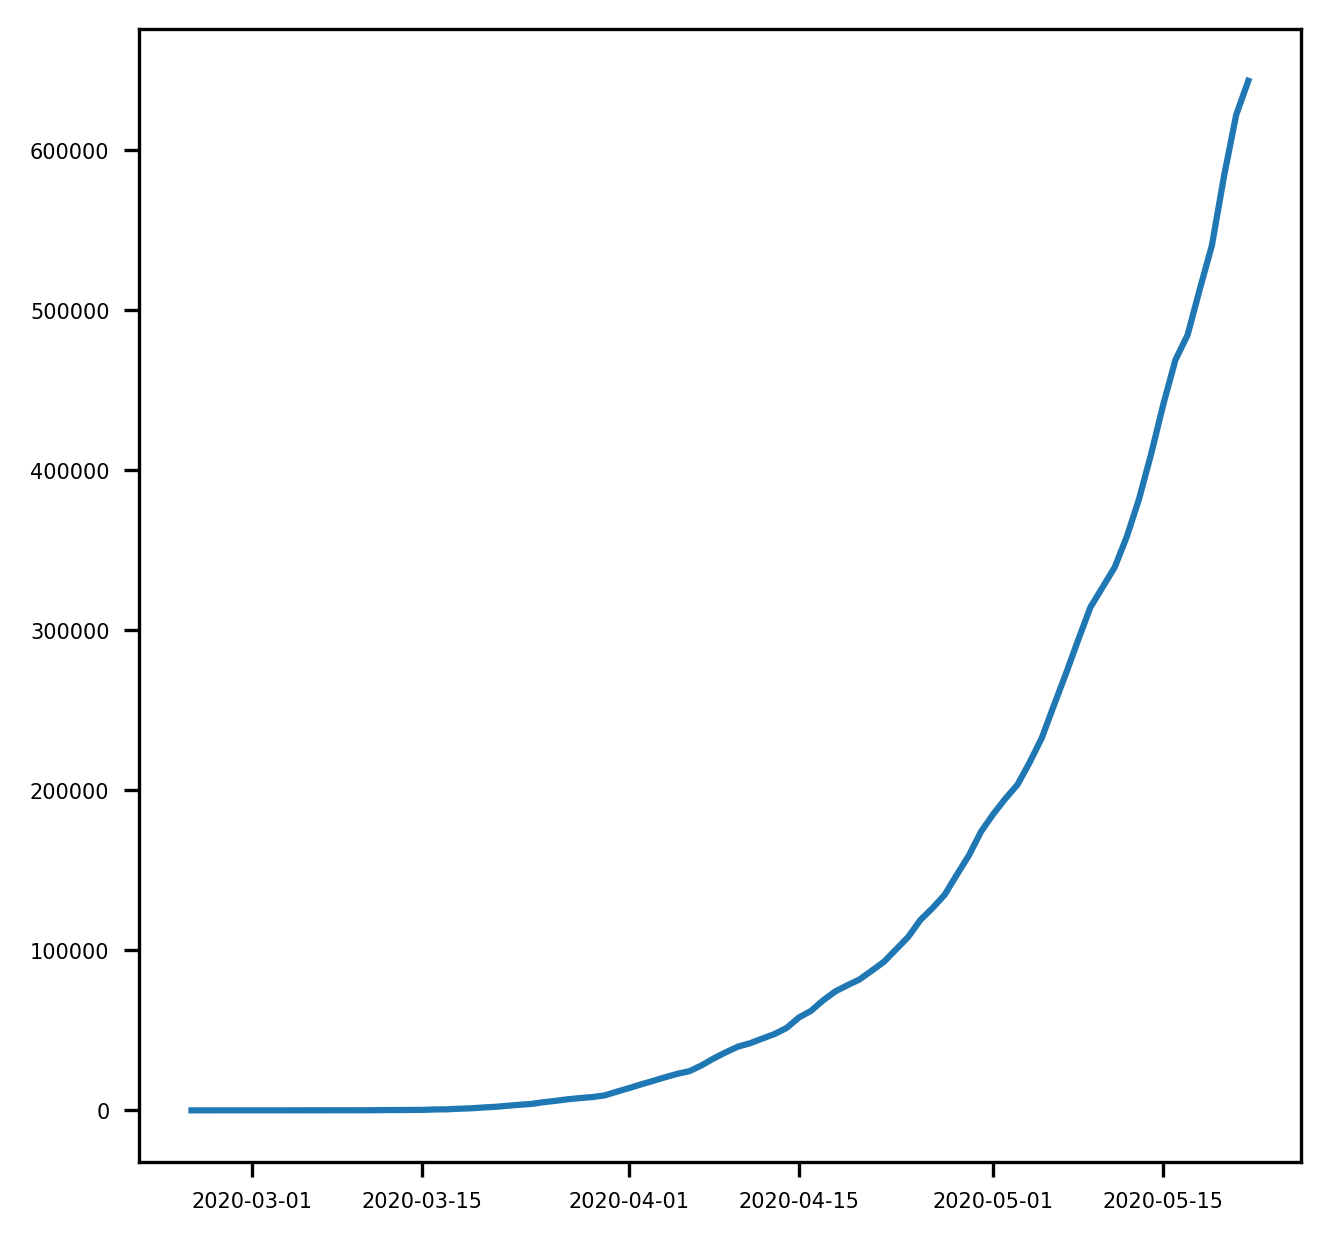

In [13]:
plt.figure(figsize=(5,5))
plt.plot(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

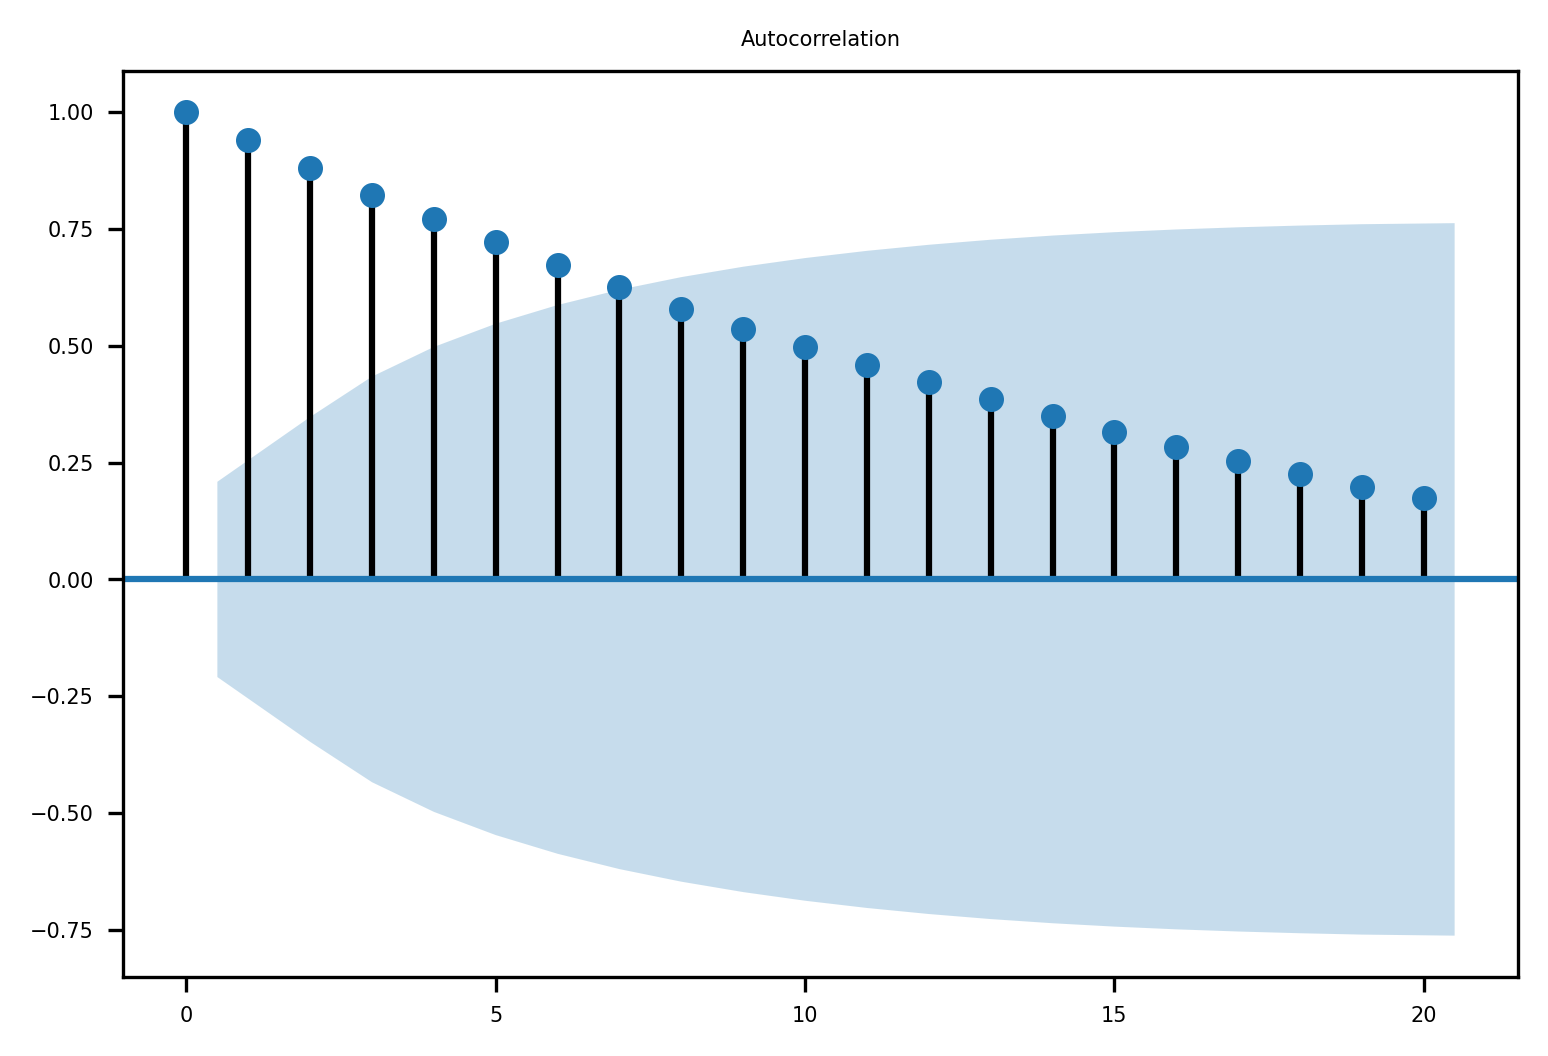

In [14]:
plt.figure(figsize=(5,2))
plot_acf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

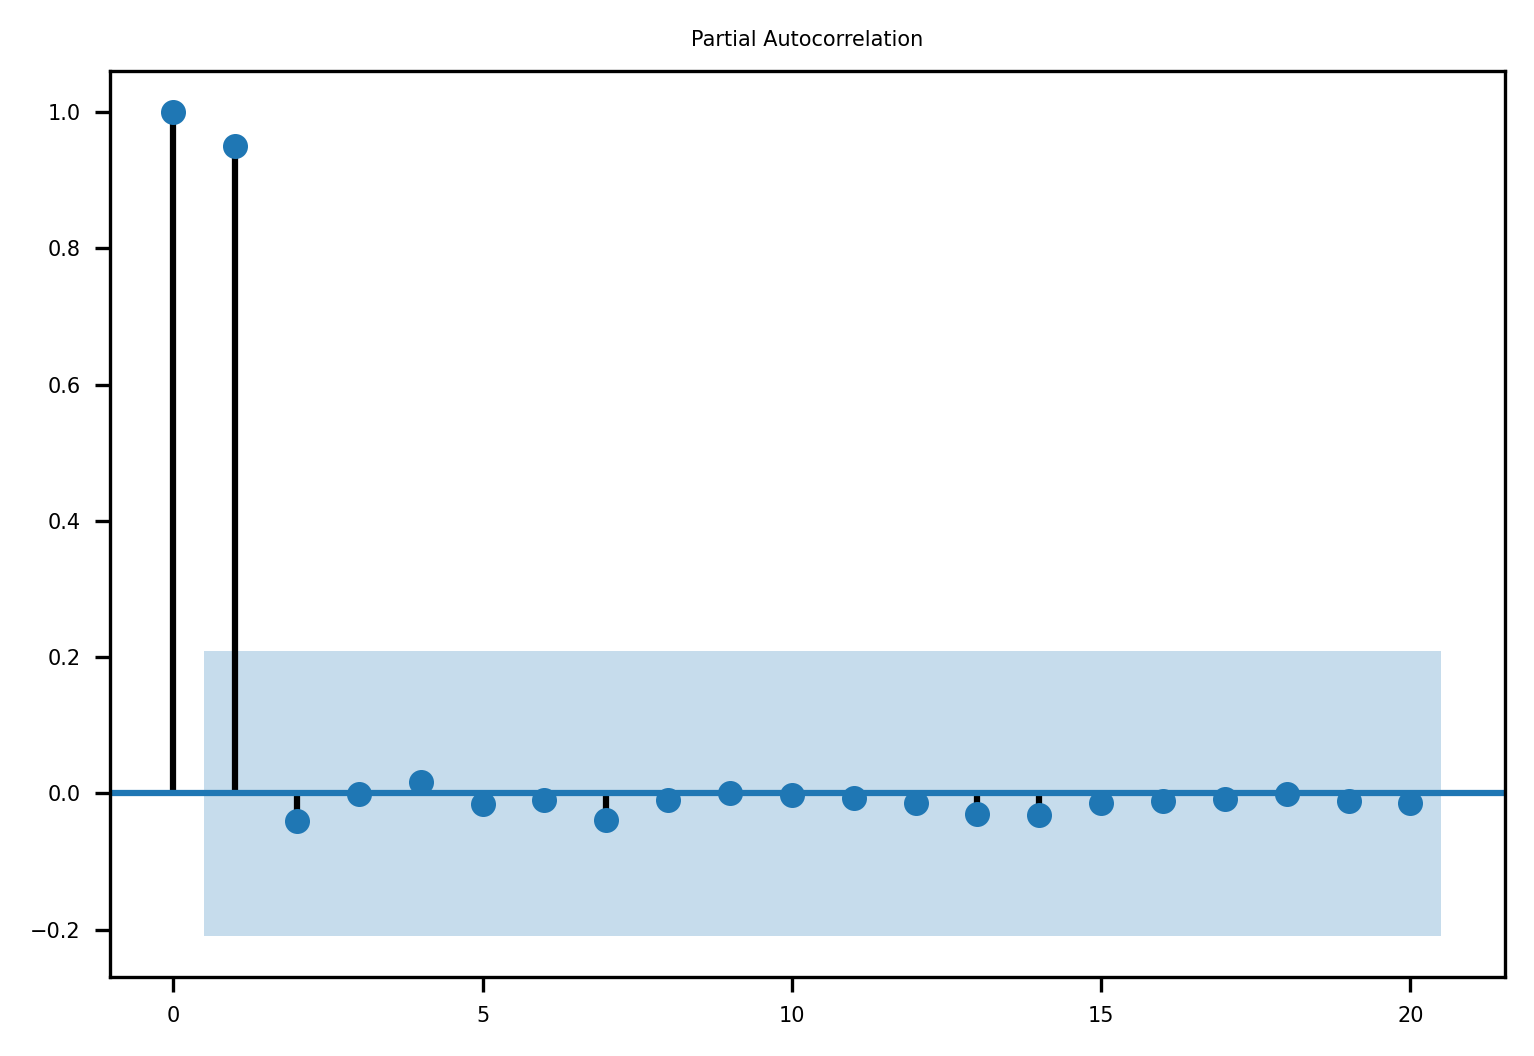

In [15]:
plt.figure(figsize=(5,2))
plot_pacf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

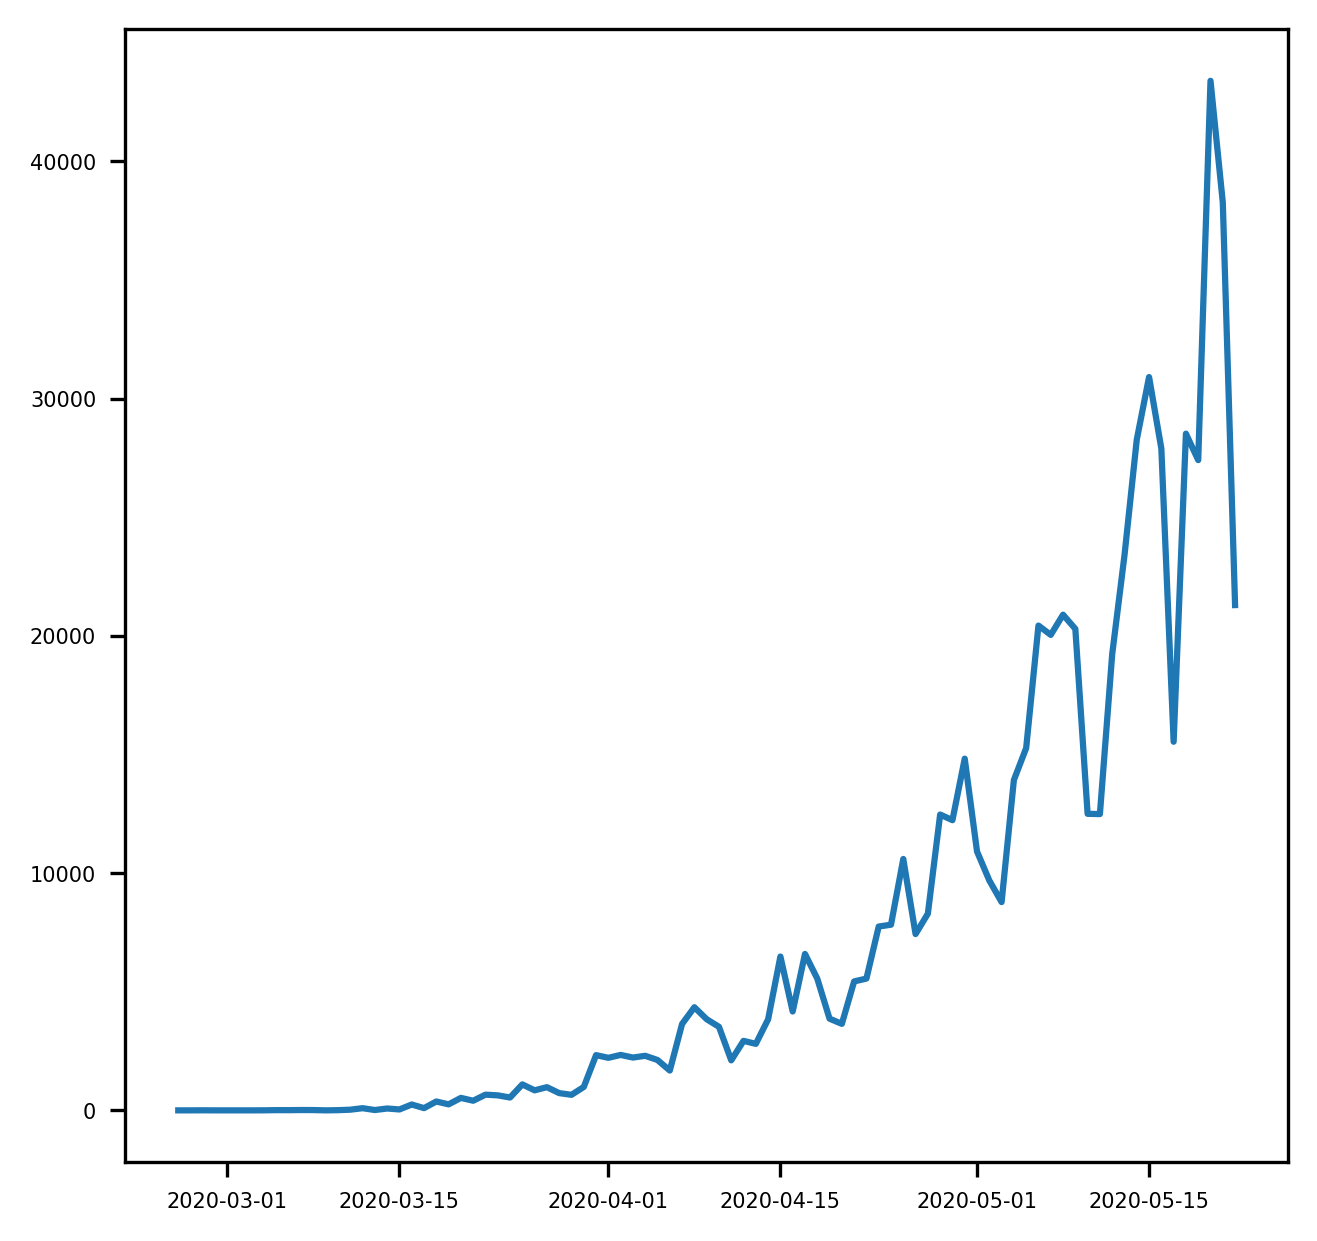

In [16]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

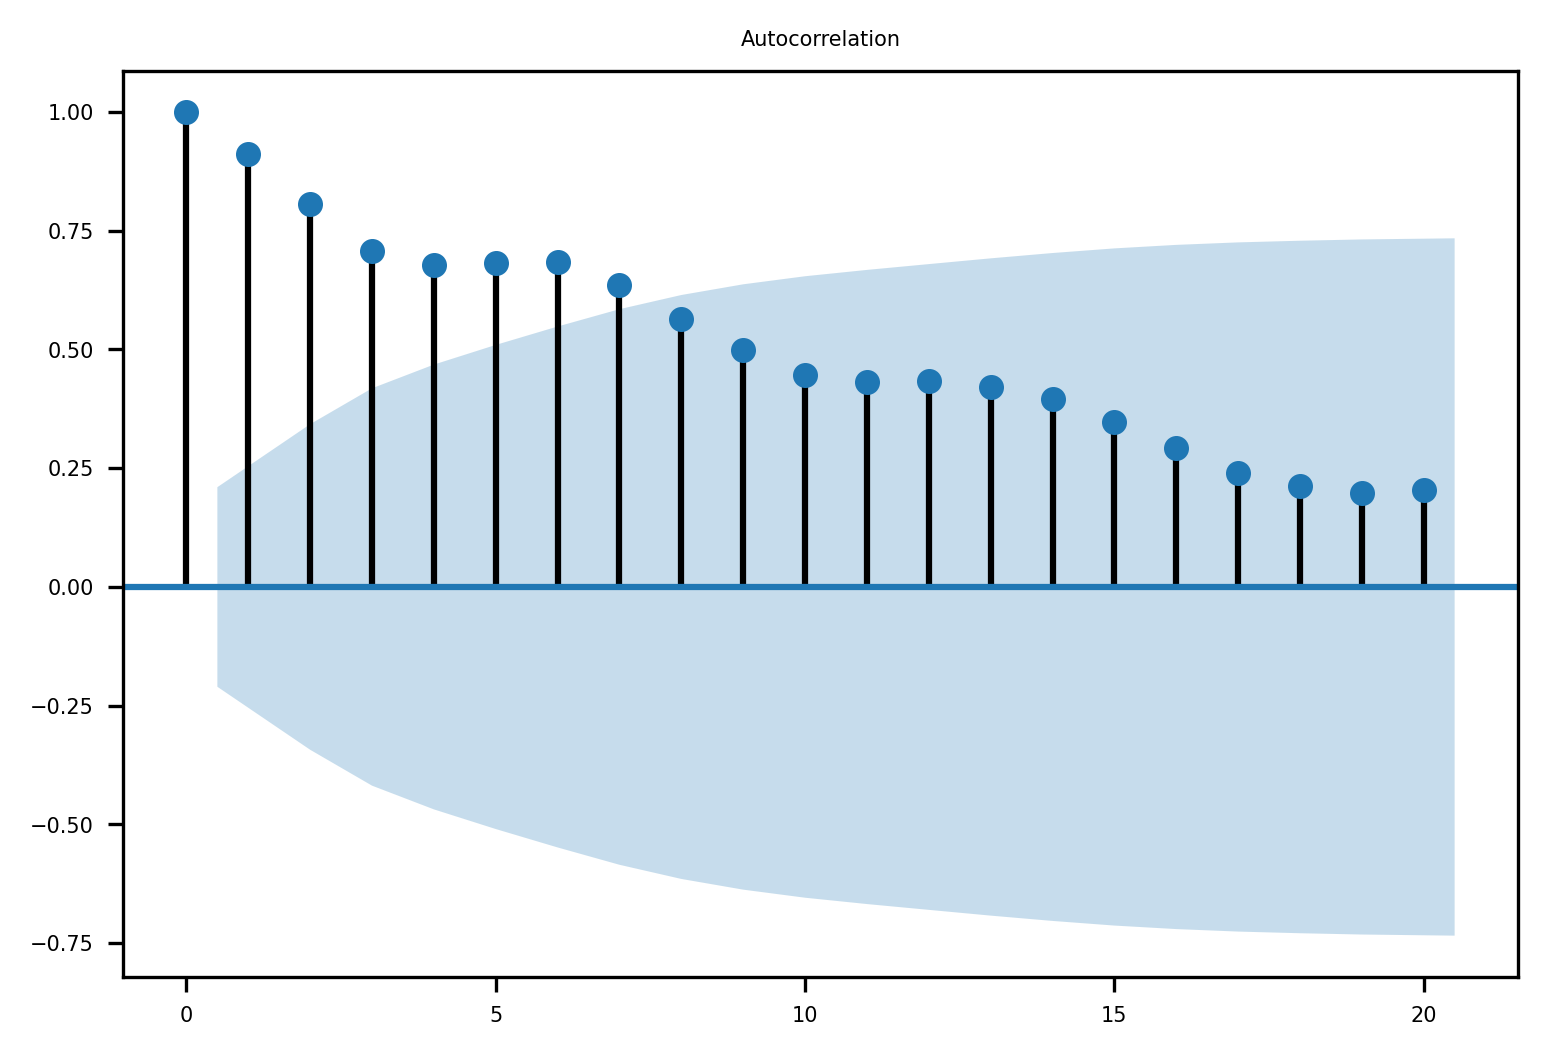

In [17]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

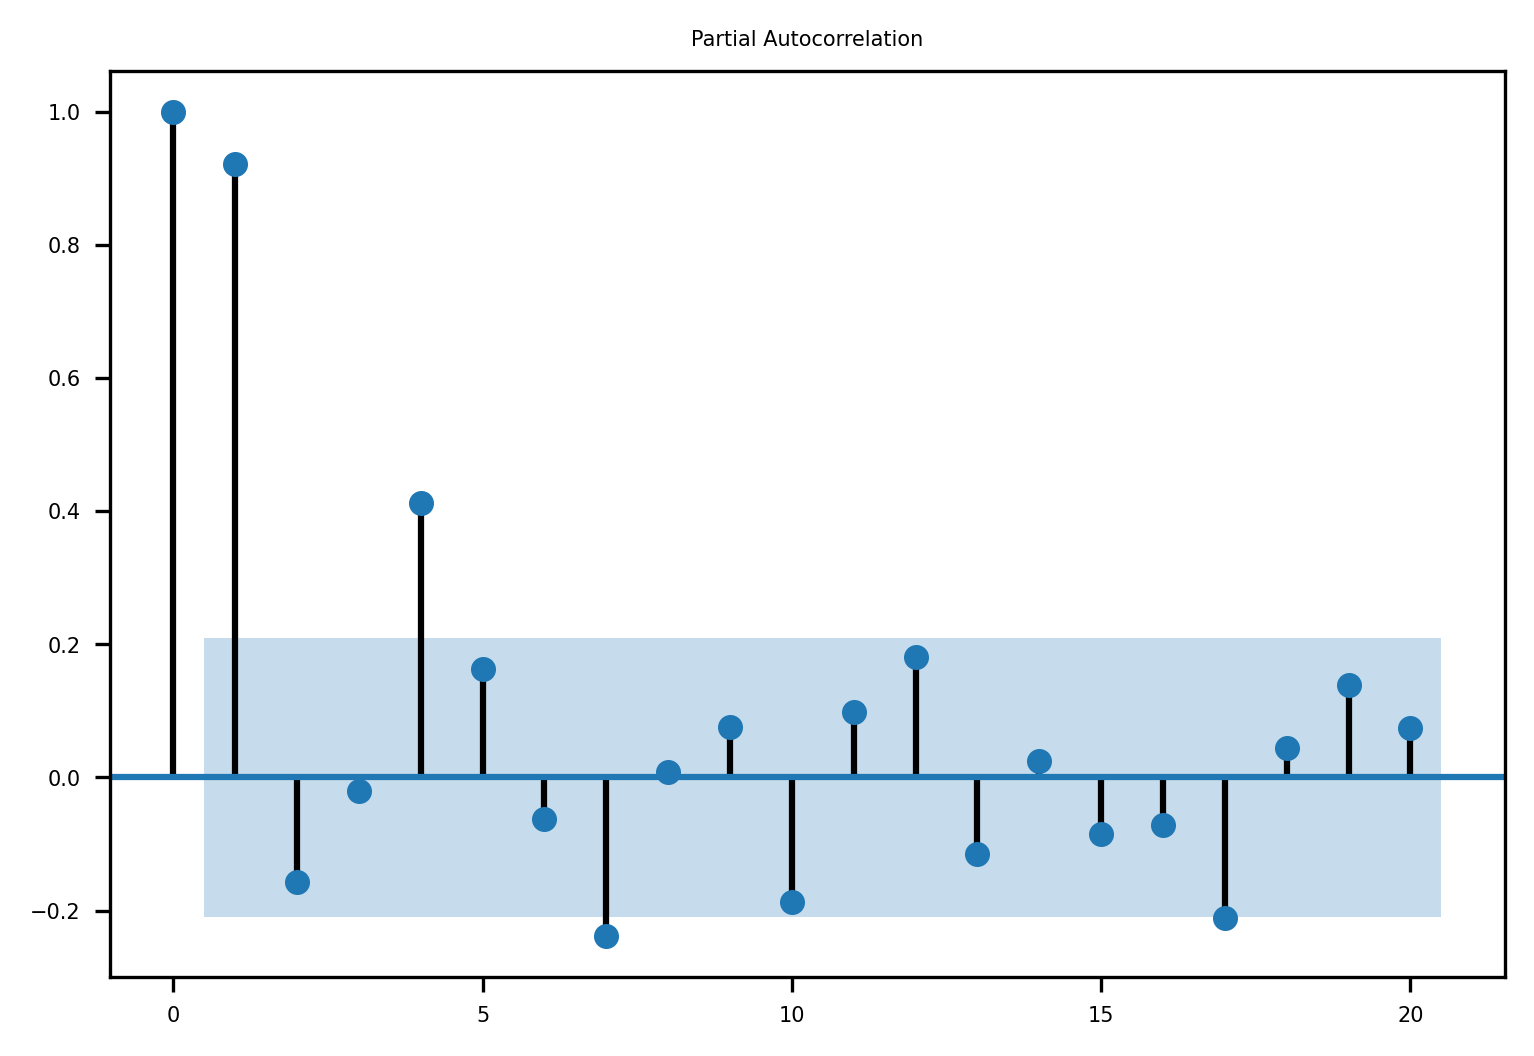

In [18]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

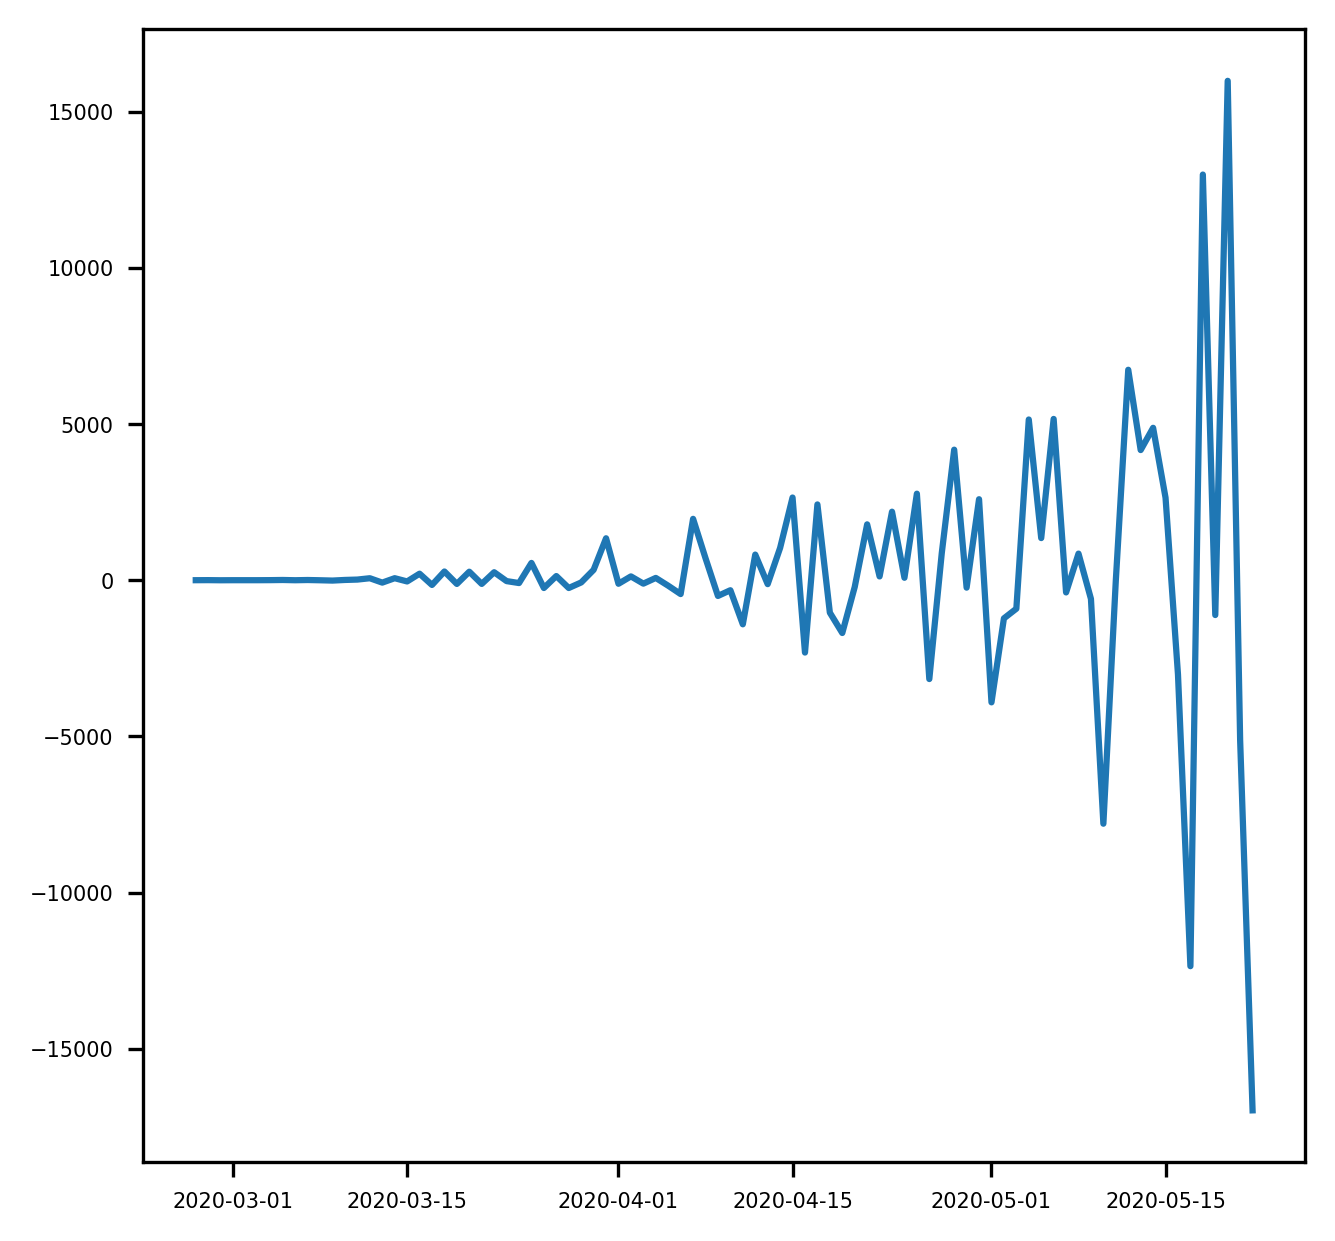

In [19]:
plt.figure(figsize=(5,5))
plt.plot(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

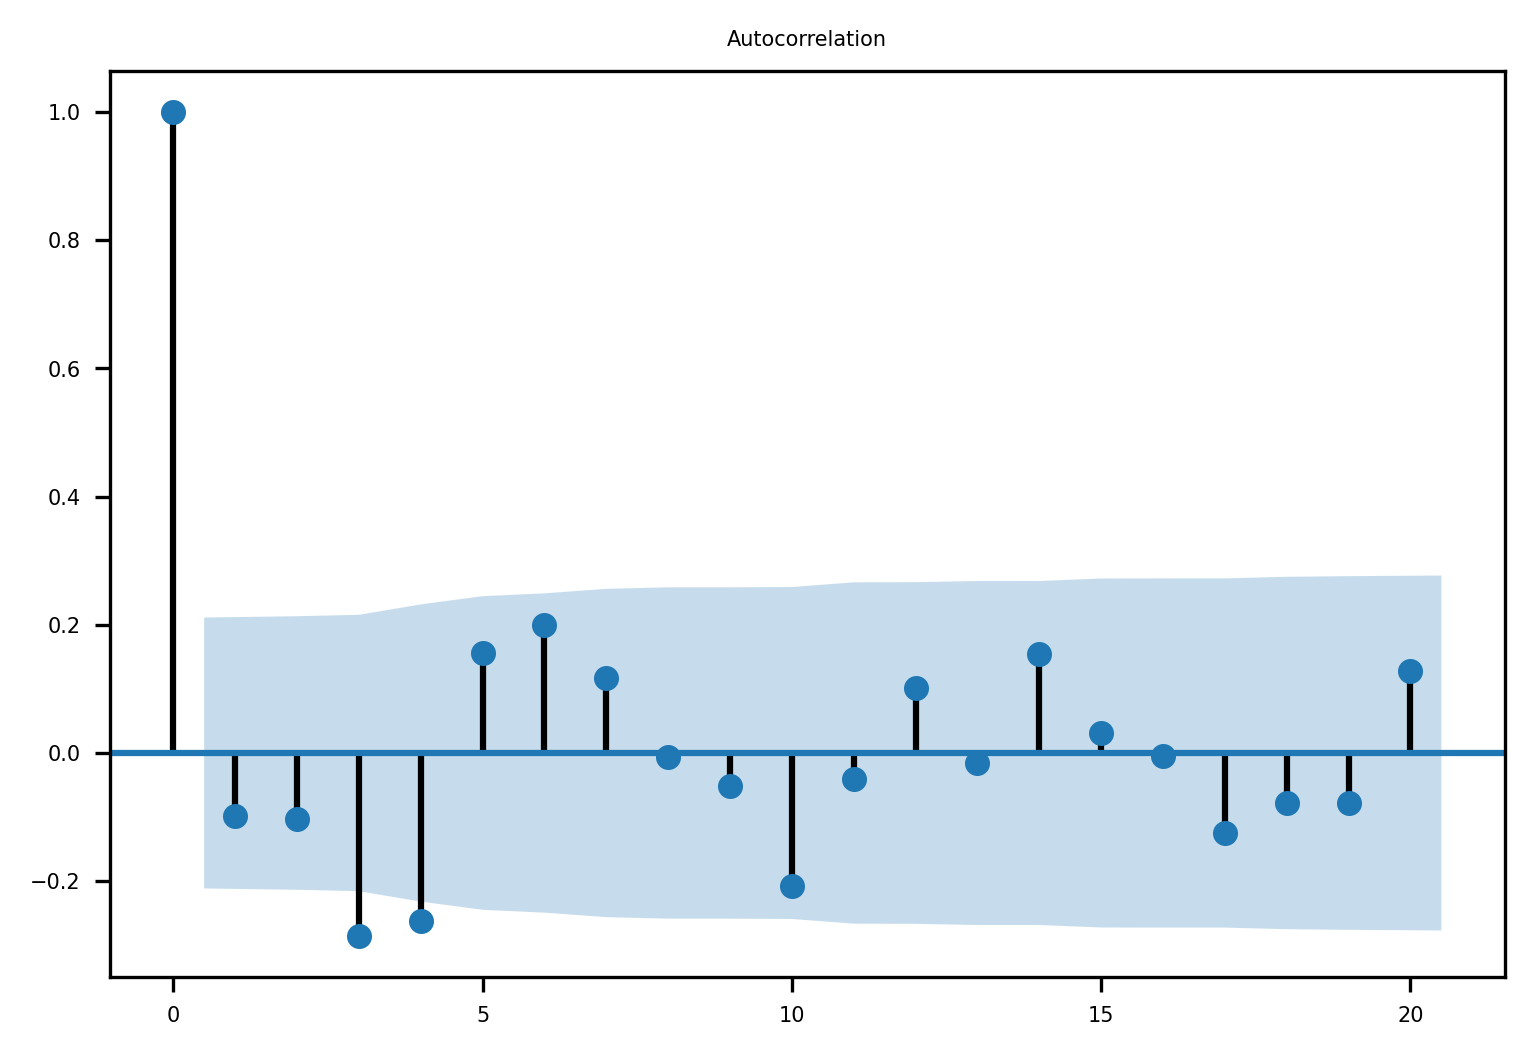

In [20]:
plt.figure(figsize=(5,2))
plot_acf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1500x600 with 0 Axes>

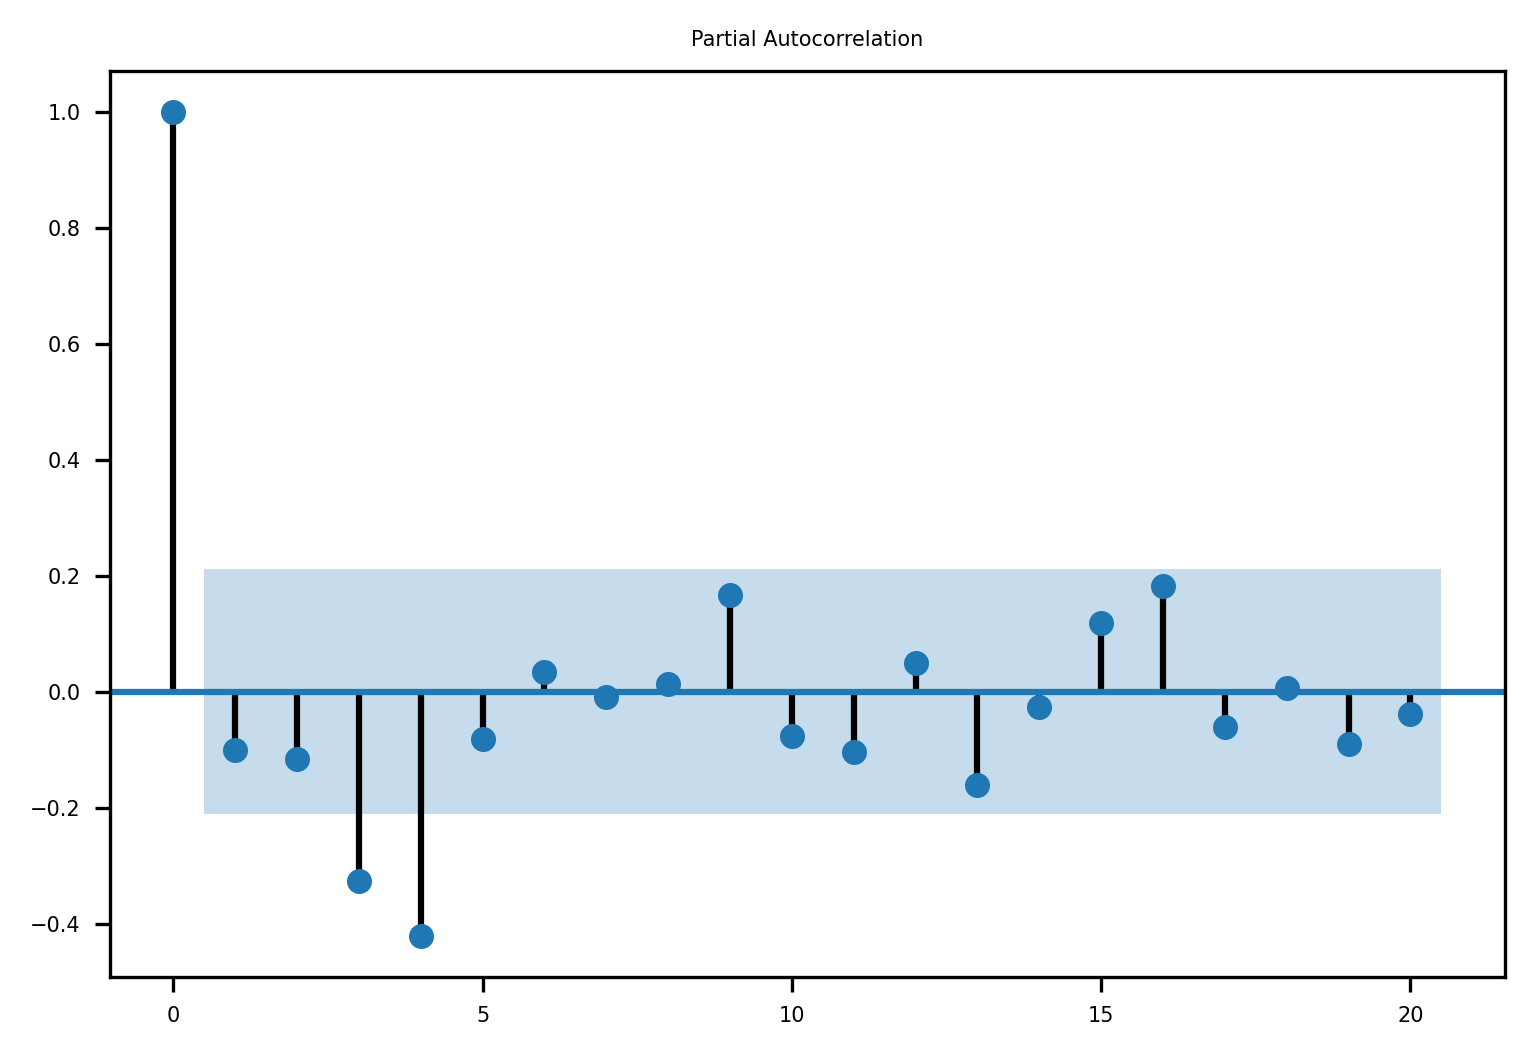

In [21]:
plt.figure(figsize=(5,2))
plot_pacf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [22]:
fonte = 20
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

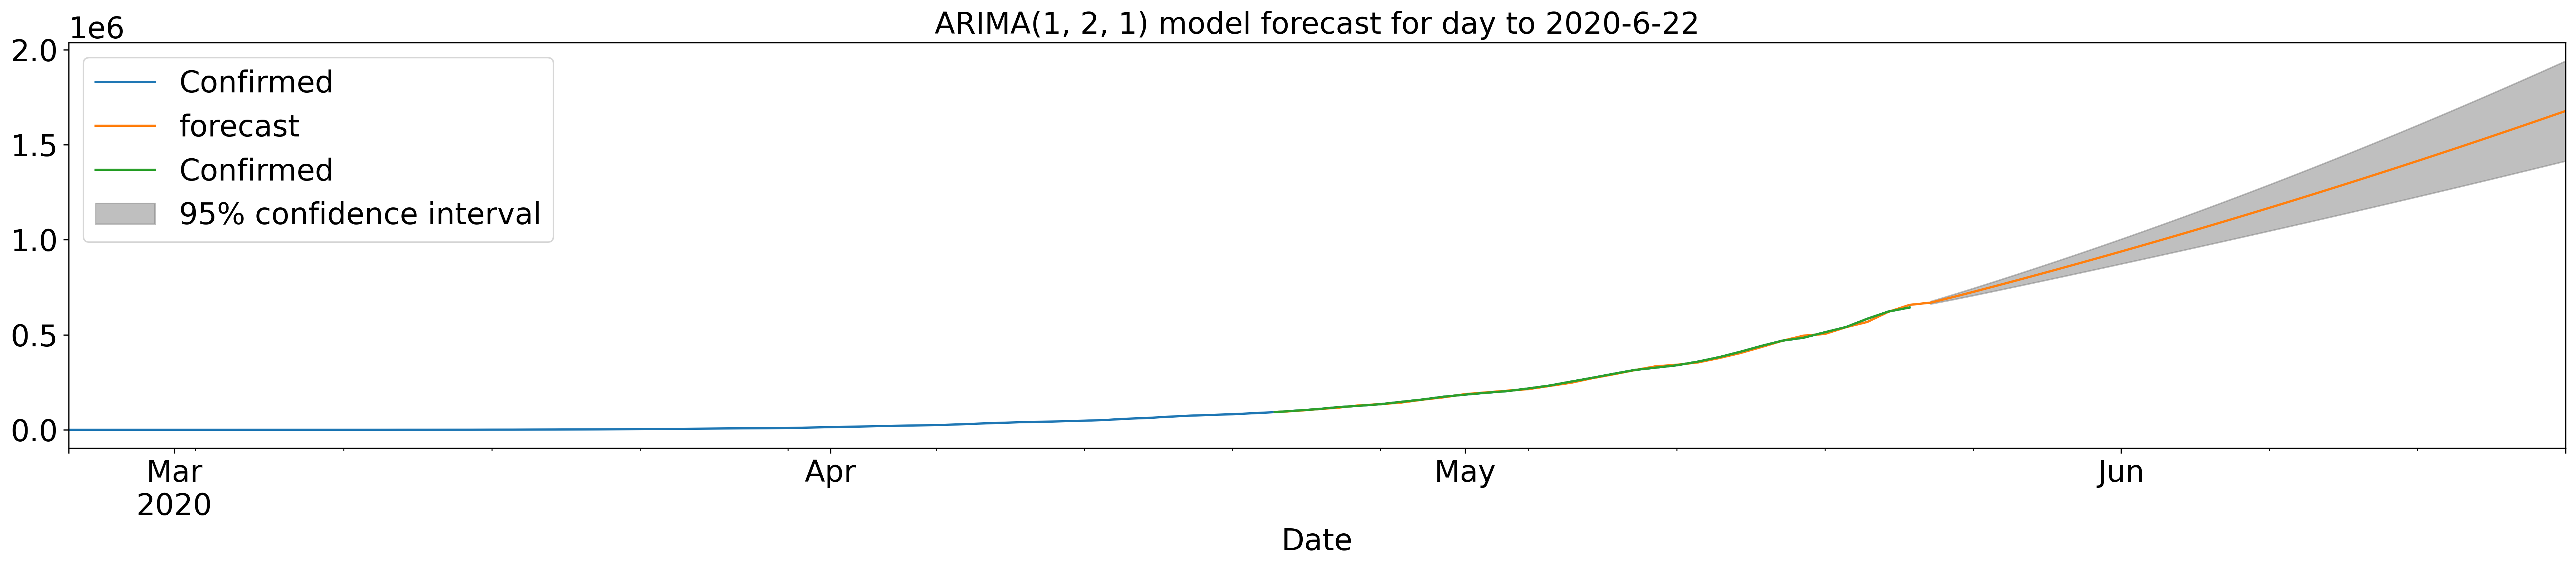

In [23]:
p = 1
d = 2
q = 1
test = (p,d,q) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                   86
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -822.982
Method:                       css-mle   S.D. of innovations           3456.699
Date:                Sat, 23 May 2020   AIC                           1653.963
Time:                        17:43:42   BIC                           1663.781
Sample:                    02-27-2020   HQIC                          1657.914
                         - 05-22-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                340.2218    126.843      2.682      0.007      91.614     588.830
ar.L1.D2.Confirmed     0.4097      0.145      2.822      0.005       0.125       0.694
ma.L1.D2.Confirmed    -0.8081      0.073    -11.095      0.000      -0.951      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4409           +0.0000j            2.4409            0.0000
MA.1            1.2375           +0.0000j            1.2375            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
pred = results.forecast(steps=30)
pred

(array([ 669190.5947466 ,  696796.469434  ,  725412.84797145,
         754644.05836162,  784327.99643675,  814398.24920479,
         844827.60770762,  875604.92461729,  906725.63294818,
         938187.86163688,  969990.84412122, 1002134.26634583,
        1034617.99964432, 1067441.99130292, 1100606.21972518,
        1134110.67606314, 1167955.35669189, 1202140.2601263 ,
        1236665.38575794, 1271530.73333753, 1306736.30276294,
        1342282.09399234, 1378168.10700858, 1414394.34180464,
        1450960.79837764, 1487867.47672641, 1525114.37685046,
        1562701.49874959, 1600628.84242372, 1638896.40787283]),
 array([  3456.69905606,   6526.89942877,   9608.86231801,  12721.04624968,
         15892.48765276,  19146.0083374 ,  22496.53259091,  25952.88491195,
         29519.76421213,  33199.22599683,  36991.6773256 ,  40896.51580311,
         44912.53279954,  49038.16656037,  53271.66113876,  57611.16637415,
         62054.80080427,  66600.69109246,  71246.99644461,  75991.92335167

In [26]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

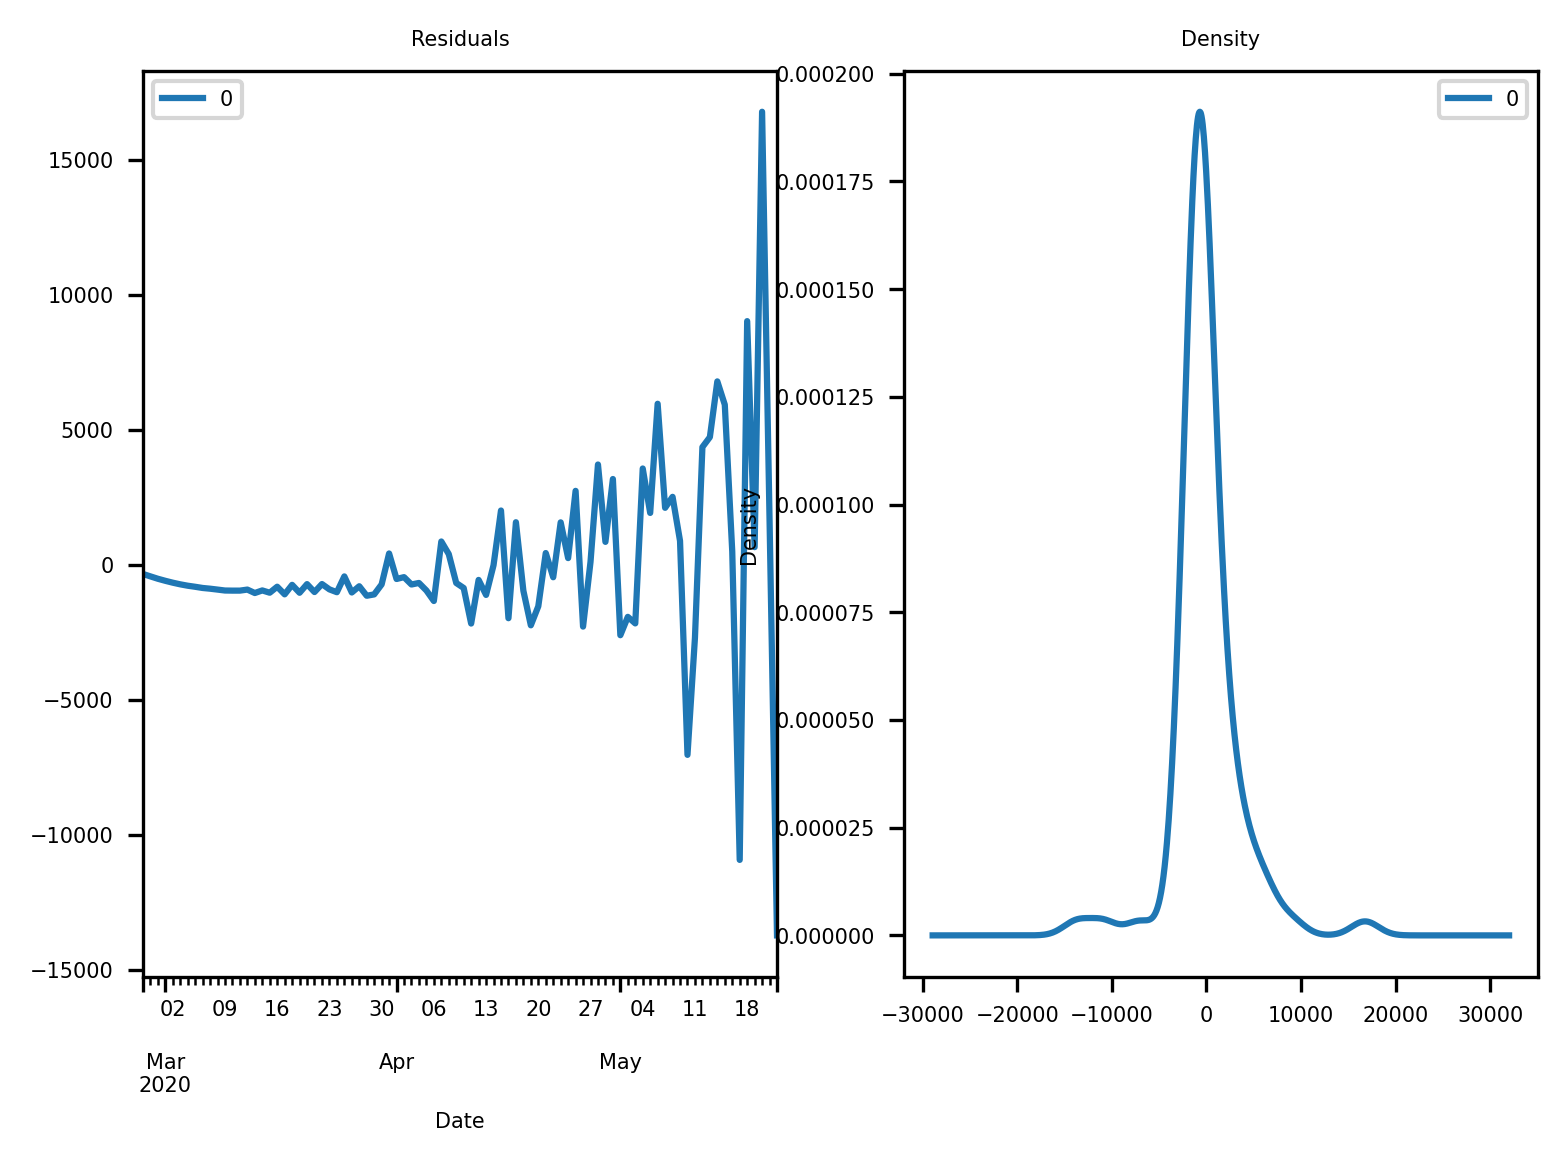

<Figure size 300x600 with 0 Axes>

In [27]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, )
plt.figure(figsize=(1,2))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

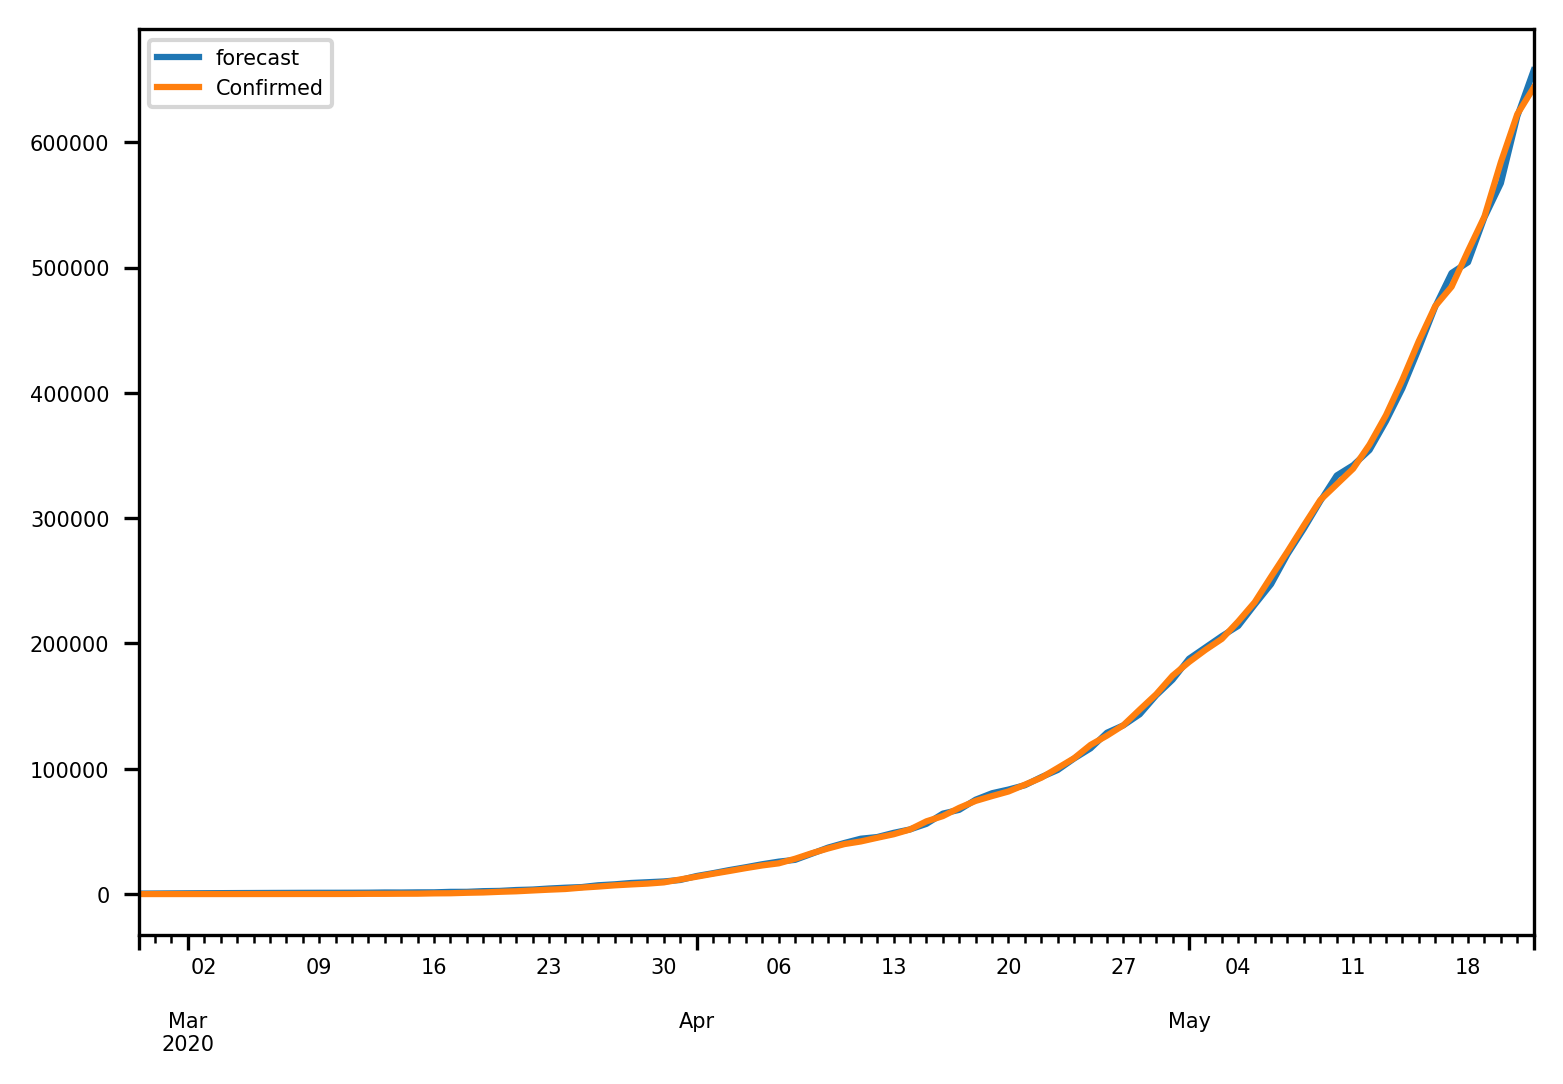

In [28]:
results.plot_predict(dynamic=False)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [29]:
fc, se, conf = results.forecast(79, alpha=0.05)
fc

array([ 669190.5947466 ,  696796.469434  ,  725412.84797145,
        754644.05836162,  784327.99643675,  814398.24920479,
        844827.60770762,  875604.92461729,  906725.63294818,
        938187.86163688,  969990.84412122, 1002134.26634583,
       1034617.99964432, 1067441.99130292, 1100606.21972518,
       1134110.67606314, 1167955.35669189, 1202140.2601263 ,
       1236665.38575794, 1271530.73333753, 1306736.30276294,
       1342282.09399234, 1378168.10700858, 1414394.34180464,
       1450960.79837764, 1487867.47672641, 1525114.37685046,
       1562701.49874959, 1600628.84242372, 1638896.40787283,
       1677504.19509688, 1716452.20409589, 1755740.43486985,
       1795368.88741875, 1835337.5617426 , 1875646.45784139,
       1916295.57571513, 1957284.91536382, 1998614.47678745,
       2040284.25998602, 2082294.26495955, 2124644.49170802,
       2167334.94023143, 2210365.61052979, 2253736.5026031 ,
       2297447.61645135, 2341498.95207455, 2385890.5094727 ,
       2430622.28864579,

In [30]:
from statsmodels.tsa.stattools import acf

In [33]:
model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1663.474, BIC=1668.383, Time=0.006 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1664.364, BIC=1671.727, Time=0.011 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1659.767, BIC=1667.130, Time=0.070 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1661.871, BIC=1664.326, Time=0.007 seconds
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1654.047, BIC=1663.865, Time=0.100 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1651.115, BIC=1663.387, Time=0.130 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1664.346, BIC=1674.164, Time=0.017 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1640.040, BIC=1654.766, Time=0.080 seconds
Fit ARIMA: (3, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1651.044, BIC=1663.316, Time=0.051 seconds
Fit ARIMA: (3, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1630.666, BIC=1647.

In [34]:
smodel = pm.auto_arima(df, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=30,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 1, 1, 30) (constant=True); AIC=1113.606, BIC=1119.682, Time=0.444 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=True); AIC=1112.806, BIC=1116.857, Time=0.038 seconds
Fit ARIMA: (1, 2, 0)x(1, 1, 0, 30) (constant=True); AIC=1113.614, BIC=1121.715, Time=0.886 seconds
Near non-invertible roots for order (1, 2, 0)(1, 1, 0, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 1)x(0, 1, 1, 30) (constant=True); AIC=1106.181, BIC=1114.283, Time=2.642 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=False); AIC=1111.068, BIC=1113.094, Time=0.067 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 0, 30) (constant=True); AIC=1105.797, BIC=1111.873, Time=0.355 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 0, 30) (constant=True); AIC=1105.908, BIC=1114.009, Time=2.906 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 1, 30) (constant=True); AIC=1107.693, BIC=1117.820, Time=4.073 seconds
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   88
Model:             SARIMAX(3, 2, 1)x(0, 1, [], 30)   Log Likelihood                -537.352
Date:                             Sat, 23 May 2020   AIC                           1086.704
Time:                                     17:46:12   BIC                           1098.856
Sample:                                          0   HQIC                          1091.415
                                              - 88                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    637.8876    320.608      1.990      0.047       9.508    1266.268
ar.L1          0.2813      0.101      2.775      0.006       0.083       0.480
ar.L2         -0.1958      0.108     -1.805      0.071      -0.408       0.017
ar.L3         -0.7671      0.119     -6.468      0.000      -1.000      -0.535
ma.L1         -0.6595      0.148     -4.452      0.000      -0.950      -0.369
sigma2       1.56e+07      0.019   8.06e+08      0.000    1.56e+07    1.56e+07
===================================================================================
Ljung-Box (Q):                       25.87   Jarque-Bera (JB):                14.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              19.03   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.4e+23. Standard errors may be unstable.
"""

In [35]:
sxmodel = pm.auto_arima(df, 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 2, 0)x(0, 1, 1, 30) (constant=True); AIC=1113.606, BIC=1119.682, Time=0.403 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=True); AIC=1112.806, BIC=1116.857, Time=0.038 seconds
Fit ARIMA: (1, 2, 0)x(1, 1, 0, 30) (constant=True); AIC=1113.614, BIC=1121.715, Time=0.880 seconds
Near non-invertible roots for order (1, 2, 0)(1, 1, 0, 30); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: (0, 2, 1)x(0, 1, 1, 30) (constant=True); AIC=1106.181, BIC=1114.283, Time=2.597 seconds
Fit ARIMA: (0, 2, 0)x(0, 1, 0, 30) (constant=False); AIC=1111.068, BIC=1113.094, Time=0.073 seconds
Fit ARIMA: (0, 2, 1)x(0, 1, 0, 30) (constant=True); AIC=1105.797, BIC=1111.873, Time=0.373 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 0, 30) (constant=True); AIC=1105.908, BIC=1114.009, Time=2.946 seconds
Fit ARIMA: (0, 2, 1)x(1, 1, 1, 30) (constant=True); AIC=1107.693, BIC=1117.820, Time=3.942 seconds
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   88
Model:             SARIMAX(3, 2, 1)x(0, 1, [], 30)   Log Likelihood                -537.352
Date:                             Sat, 23 May 2020   AIC                           1086.704
Time:                                     17:47:54   BIC                           1098.856
Sample:                                          0   HQIC                          1091.415
                                              - 88                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    637.8876    320.608      1.990      0.047       9.508    1266.268
ar.L1          0.2813      0.101      2.775      0.006       0.083       0.480
ar.L2         -0.1958      0.108     -1.805      0.071      -0.408       0.017
ar.L3         -0.7671      0.119     -6.468      0.000      -1.000      -0.535
ma.L1         -0.6595      0.148     -4.452      0.000      -0.950      -0.369
sigma2       1.56e+07      0.019   8.06e+08      0.000    1.56e+07    1.56e+07
===================================================================================
Ljung-Box (Q):                       25.87   Jarque-Bera (JB):                14.88
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              19.03   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.4e+23. Standard errors may be unstable.
"""

In [36]:
y = df[campo]
param_list_best=(1,2,1)
param_s_list_best=(0,1,0,30)
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()

C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\gfsil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Confirmed   No. Observations:                   88
Model:             SARIMAX(1, 2, 1)x(0, 1, [], 30)   Log Likelihood                -533.209
Date:                             Sat, 23 May 2020   AIC                           1072.418
Time:                                     17:47:55   BIC                           1078.385
Sample:                                 02-25-2020   HQIC                          1074.719
                                      - 05-22-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6000      0.132      4.560      0.000       0.342       0.858
ma.L1         -1.1245      0.055    -20.337      0.000      -1.233      -1.016
sigma2      2.181e+07   4.53e-09   4.82e+15      0.000    2.18e+07    2.18e+07
===================================================================================
Ljung-Box (Q):                       30.23   Jarque-Bera (JB):                69.99
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):              48.54   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+31. Standard errors may be unstable.
"""

In [37]:
fonte = 15
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

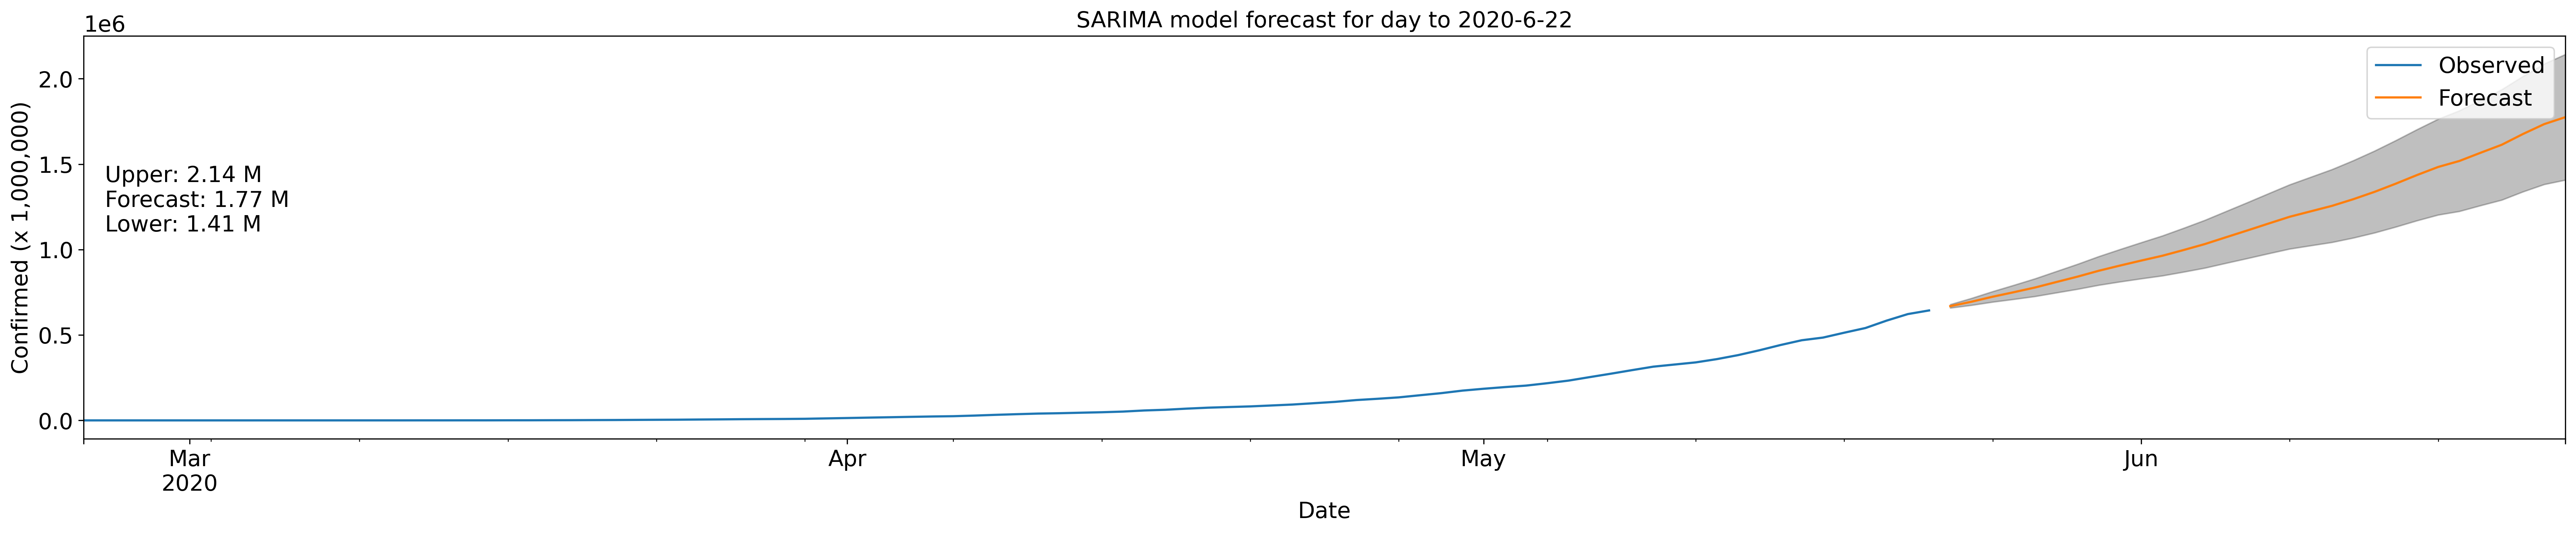

In [38]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-300000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')